## Pandas y estructura de limpieza de datos

* Profesor : [Daniel Jiménez](https://www.danieljimenezm.com/)

* Institución :[Universidad Nacional de Colombia](https://unal.edu.co/)

__Objetivo:__ Introducir al estudiante en el uso de pandas para el trabajo de cruces de bases de datos, para finalizar con un ejercicio de limpieza de datos bajo el esquema de las mejores practicas. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns 



In [2]:
directors = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-11-23/directors.csv')
episodes = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-11-23/episodes.csv')
writers = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-11-23/writers.csv')
imdb = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-11-23/imdb.csv')

## Primeros pasos para unir bases de datos 

1. Explore un poco la base de datos
2. Defina cual es la base de datos principal, con la cual trabajará
3. Identifique el key que usará para ello
4. Verifique que la base de datos gana consistencia 

In [3]:
directors.head()

,story_number,director
0,157,Keith Boak
1,158,Euros Lyn
2,159,Euros Lyn
3,160a,Keith Boak
4,160b,Keith Boak


In [4]:
episodes.head()

,era,season_number,serial_title,story_number,episode_number,episode_title,type,first_aired,production_code,uk_viewers,rating,duration
0,revived,1.0,NaN,157,1.0,Rose,episode,2005-03-26,1.1,10.81,76.0,45.0
1,revived,1.0,NaN,158,2.0,The End of the World,episode,2005-04-02,1.2,7.97,76.0,44.0
2,revived,1.0,NaN,159,3.0,The Unquiet Dead,episode,2005-04-09,1.3,8.86,80.0,44.0
3,revived,1.0,NaN,160a,4.0,Aliens of London,episode,2005-04-16,1.4,7.63,82.0,45.0
4,revived,1.0,NaN,160b,5.0,World War Three,episode,2005-04-23,1.5,7.98,81.0,42.0


In [5]:
writers.head()

,story_number,writer
0,157,Russell T Davies
1,158,Russell T Davies
2,159,Mark Gatiss
3,160a,Russell T Davies
4,160b,Russell T Davies


In [6]:
imdb.head()

,season,ep_num,air_date,rating,rating_n,desc
0,1,1,17 Mar. 2006,7.5,8301,When ordinary shop-worker Rose Tyler meets a m...
1,1,2,17 Mar. 2006,7.5,7279,The Doctor takes Rose to the year 5 billion to...
2,1,3,24 Mar. 2006,7.5,6804,The Doctor has great expectations for his late...
3,1,4,31 Mar. 2006,7.0,6543,The Doctor returns Rose to her own time - well...
4,1,5,7 Apr. 2006,7.0,6337,The Slitheen have infiltrated Parliament and h...


Para el caso anterior se selecciono la base `episodes` como principal para hacer los cruces. 

Ahora hay que entender el tipo de cruces de bases de datos que son canónicos

![](https://ingenieriadesoftware.es/wp-content/uploads/2018/07/sqljoin.jpeg)

**imagen tomada de :https://ingenieriadesoftware.es/tipos-sql-join-guia-referencia/**



## Inner Join

![](https://datacarpentry.org/python-ecology-lesson-es/fig/inner-join.png)

Este es el cruce de base de datos clásico, por lo tanto consiste en traer los datos que hacen match entre dos tablas seleccionadas


In [7]:
## Caso Doctor Who
pd.merge(episodes,directors)

,era,season_number,serial_title,story_number,episode_number,episode_title,type,first_aired,production_code,uk_viewers,rating,duration,director
0,revived,1.0,NaN,157,1.0,Rose,episode,2005-03-26,1.1,10.81,76.0,45.0,Keith Boak
1,revived,1.0,NaN,158,2.0,The End of the World,episode,2005-04-02,1.2,7.97,76.0,44.0,Euros Lyn
2,revived,1.0,NaN,159,3.0,The Unquiet Dead,episode,2005-04-09,1.3,8.86,80.0,44.0,Euros Lyn
3,revived,1.0,NaN,160a,4.0,Aliens of London,episode,2005-04-16,1.4,7.63,82.0,45.0,Keith Boak
4,revived,1.0,NaN,160b,5.0,World War Three,episode,2005-04-23,1.5,7.98,81.0,42.0,Keith Boak
...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,revived,13.0,Flux,297b,2.0,War of the Sontarans,episode,2021-11-07,NaN,NaN,77.0,59.0,Jamie Magnus Stone
168,revived,13.0,Flux,297c,3.0,"Once, Upon Time",episode,2021-11-14,NaN,NaN,NaN,49.0,Azhur Saleem
169,revived,13.0,Flux,297d,4.0,Village of the Angels,episode,2021-11-21,NaN,NaN,NaN,NaN,Jamie Magnus Stone
170,revived,13.0,Flux,297e,5.0,Survivors of the Flux,episode,2021-11-28,NaN,NaN,NaN,NaN,Azhur Saleem


En el caso anterior las celdas se cruzaron por default a través de la columna **story_number**

In [8]:
# Notese que lo anterior se pudo escribir de la siguiente manera 
pd.merge(episodes,directors, left_on='story_number', right_on='story_number')

,era,season_number,serial_title,story_number,episode_number,episode_title,type,first_aired,production_code,uk_viewers,rating,duration,director
0,revived,1.0,NaN,157,1.0,Rose,episode,2005-03-26,1.1,10.81,76.0,45.0,Keith Boak
1,revived,1.0,NaN,158,2.0,The End of the World,episode,2005-04-02,1.2,7.97,76.0,44.0,Euros Lyn
2,revived,1.0,NaN,159,3.0,The Unquiet Dead,episode,2005-04-09,1.3,8.86,80.0,44.0,Euros Lyn
3,revived,1.0,NaN,160a,4.0,Aliens of London,episode,2005-04-16,1.4,7.63,82.0,45.0,Keith Boak
4,revived,1.0,NaN,160b,5.0,World War Three,episode,2005-04-23,1.5,7.98,81.0,42.0,Keith Boak
...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,revived,13.0,Flux,297b,2.0,War of the Sontarans,episode,2021-11-07,NaN,NaN,77.0,59.0,Jamie Magnus Stone
168,revived,13.0,Flux,297c,3.0,"Once, Upon Time",episode,2021-11-14,NaN,NaN,NaN,49.0,Azhur Saleem
169,revived,13.0,Flux,297d,4.0,Village of the Angels,episode,2021-11-21,NaN,NaN,NaN,NaN,Jamie Magnus Stone
170,revived,13.0,Flux,297e,5.0,Survivors of the Flux,episode,2021-11-28,NaN,NaN,NaN,NaN,Azhur Saleem


## Left Join 

![](https://datacarpentry.org/python-ecology-lesson-es/fig/left-join.png)

Esta versión del cruce solo trae todos los datos que se soliciten de la base de datos que este en la izquierda



In [9]:
# Notese que si hay valores nulos en la base de datos de la derecha, no se traerá nada de ese frame
pd.merge(episodes,writers,how='left',left_on='story_number', right_on='story_number')


,era,season_number,serial_title,story_number,episode_number,episode_title,type,first_aired,production_code,uk_viewers,rating,duration,writer
0,revived,1.0,NaN,157,1.0,Rose,episode,2005-03-26,1.1,10.81,76.0,45.0,Russell T Davies
1,revived,1.0,NaN,158,2.0,The End of the World,episode,2005-04-02,1.2,7.97,76.0,44.0,Russell T Davies
2,revived,1.0,NaN,159,3.0,The Unquiet Dead,episode,2005-04-09,1.3,8.86,80.0,44.0,Mark Gatiss
3,revived,1.0,NaN,160a,4.0,Aliens of London,episode,2005-04-16,1.4,7.63,82.0,45.0,Russell T Davies
4,revived,1.0,NaN,160b,5.0,World War Three,episode,2005-04-23,1.5,7.98,81.0,42.0,Russell T Davies
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,revived,13.0,Flux,297c,3.0,"Once, Upon Time",episode,2021-11-14,NaN,NaN,NaN,49.0,Chris Chibnall
181,revived,13.0,Flux,297d,4.0,Village of the Angels,episode,2021-11-21,NaN,NaN,NaN,NaN,Chris Chibnall
182,revived,13.0,Flux,297d,4.0,Village of the Angels,episode,2021-11-21,NaN,NaN,NaN,NaN,Maxine Alderton
183,revived,13.0,Flux,297e,5.0,Survivors of the Flux,episode,2021-11-28,NaN,NaN,NaN,NaN,Chris Chibnall


In [10]:
merged_left = pd.merge(episodes,writers,how='left',left_on='story_number', right_on='story_number')
merged_left[pd.isnull(merged_left['uk_viewers'])]

,era,season_number,serial_title,story_number,episode_number,episode_title,type,first_aired,production_code,uk_viewers,rating,duration,writer
179,revived,13.0,Flux,297b,2.0,War of the Sontarans,episode,2021-11-07,NaN,NaN,77.0,59.0,Chris Chibnall
180,revived,13.0,Flux,297c,3.0,"Once, Upon Time",episode,2021-11-14,NaN,NaN,NaN,49.0,Chris Chibnall
181,revived,13.0,Flux,297d,4.0,Village of the Angels,episode,2021-11-21,NaN,NaN,NaN,NaN,Chris Chibnall
182,revived,13.0,Flux,297d,4.0,Village of the Angels,episode,2021-11-21,NaN,NaN,NaN,NaN,Maxine Alderton
183,revived,13.0,Flux,297e,5.0,Survivors of the Flux,episode,2021-11-28,NaN,NaN,NaN,NaN,Chris Chibnall
184,revived,13.0,Flux,297f,6.0,NaN,episode,2021-12-05,NaN,NaN,NaN,NaN,Chris Chibnall


## Rigth join 

![](https://res.cloudinary.com/pym/image/upload/c_scale,f_auto,q_auto,w_258/articles/2019/sql/RIGHT_JOIN)

En este caso la prioridad en el cruce se le da a la base de datos que se encuentre en la derecha

In [11]:
pd.merge(episodes,writers,how='right',left_on='story_number', right_on='story_number')

,era,season_number,serial_title,story_number,episode_number,episode_title,type,first_aired,production_code,uk_viewers,rating,duration,writer
0,revived,1.0,NaN,157,1.0,Rose,episode,2005-03-26,1.1,10.81,76.0,45.0,Russell T Davies
1,revived,1.0,NaN,158,2.0,The End of the World,episode,2005-04-02,1.2,7.97,76.0,44.0,Russell T Davies
2,revived,1.0,NaN,159,3.0,The Unquiet Dead,episode,2005-04-09,1.3,8.86,80.0,44.0,Mark Gatiss
3,revived,1.0,NaN,160a,4.0,Aliens of London,episode,2005-04-16,1.4,7.63,82.0,45.0,Russell T Davies
4,revived,1.0,NaN,160b,5.0,World War Three,episode,2005-04-23,1.5,7.98,81.0,42.0,Russell T Davies
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,revived,13.0,Flux,297c,3.0,"Once, Upon Time",episode,2021-11-14,NaN,NaN,NaN,49.0,Chris Chibnall
181,revived,13.0,Flux,297d,4.0,Village of the Angels,episode,2021-11-21,NaN,NaN,NaN,NaN,Chris Chibnall
182,revived,13.0,Flux,297d,4.0,Village of the Angels,episode,2021-11-21,NaN,NaN,NaN,NaN,Maxine Alderton
183,revived,13.0,Flux,297e,5.0,Survivors of the Flux,episode,2021-11-28,NaN,NaN,NaN,NaN,Chris Chibnall


In [12]:
merged_rigth = pd.merge(episodes,writers,how='right',left_on='story_number', right_on='story_number')
merged_rigth[pd.isnull(merged_rigth['uk_viewers'])]

,era,season_number,serial_title,story_number,episode_number,episode_title,type,first_aired,production_code,uk_viewers,rating,duration,writer
179,revived,13.0,Flux,297b,2.0,War of the Sontarans,episode,2021-11-07,NaN,NaN,77.0,59.0,Chris Chibnall
180,revived,13.0,Flux,297c,3.0,"Once, Upon Time",episode,2021-11-14,NaN,NaN,NaN,49.0,Chris Chibnall
181,revived,13.0,Flux,297d,4.0,Village of the Angels,episode,2021-11-21,NaN,NaN,NaN,NaN,Chris Chibnall
182,revived,13.0,Flux,297d,4.0,Village of the Angels,episode,2021-11-21,NaN,NaN,NaN,NaN,Maxine Alderton
183,revived,13.0,Flux,297e,5.0,Survivors of the Flux,episode,2021-11-28,NaN,NaN,NaN,NaN,Chris Chibnall
184,revived,13.0,Flux,297f,6.0,NaN,episode,2021-12-05,NaN,NaN,NaN,NaN,Chris Chibnall


## Ejercicio completo con la base de datos Doctor Who

In [29]:
new_episodes = episodes.merge(directors, on='story_number').merge(writers, on='story_number')
new_episodes.head()


,era,season_number,serial_title,story_number,episode_number,episode_title,type,first_aired,production_code,uk_viewers,rating,duration,director,writer
0,revived,1.0,NaN,157,1.0,Rose,episode,2005-03-26,1.1,10.81,76.0,45.0,Keith Boak,Russell T Davies
1,revived,1.0,NaN,158,2.0,The End of the World,episode,2005-04-02,1.2,7.97,76.0,44.0,Euros Lyn,Russell T Davies
2,revived,1.0,NaN,159,3.0,The Unquiet Dead,episode,2005-04-09,1.3,8.86,80.0,44.0,Euros Lyn,Mark Gatiss
3,revived,1.0,NaN,160a,4.0,Aliens of London,episode,2005-04-16,1.4,7.63,82.0,45.0,Keith Boak,Russell T Davies
4,revived,1.0,NaN,160b,5.0,World War Three,episode,2005-04-23,1.5,7.98,81.0,42.0,Keith Boak,Russell T Davies


In [14]:
new_episodes.shape

(185, 14)

In [30]:
new_episodes.columns

Index(['era', 'season_number', 'serial_title', 'story_number',
       'episode_number', 'episode_title', 'type', 'first_aired',
       'production_code', 'uk_viewers', 'rating', 'duration', 'director',
       'writer'],
      dtype='object')

Text(0.5, 0, 'Temporada')

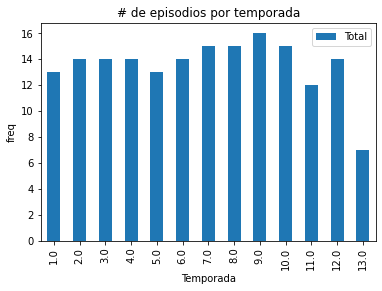

In [31]:
new_episodes.groupby('season_number').size().reset_index(name='Total').plot(kind='bar',y='Total',x='season_number')
plot.title('# de episodios por temporada')
plot.ylabel('freq')
plot.xlabel('Temporada')

In [32]:
new_episodes.groupby(['director'],as_index=False)['rating'].agg({"Count":'count',"Avg_rating":np.mean,"std_rating":np.std})

,director,Count,Avg_rating,std_rating
0,Adam Smith,3,86.333333,0.577350
1,Alice Troughton,2,87.000000,1.414214
2,Andrew Gunn,2,85.000000,1.414214
3,Andy Goddard,1,86.000000,NaN
4,Ashley Way,2,85.500000,0.707107
5,Azhur Saleem,0,NaN,NaN
6,Ben Wheatley,3,83.333333,1.154701
7,Bill Anderson,2,83.500000,0.707107
8,Brian Grant,1,81.000000,NaN
9,Catherine Morshead,2,85.500000,2.121320


In [33]:
new_episodes.groupby(['director'],as_index=False)['rating'].agg({"Count":'count',"Avg_rating":np.mean,"std_rating":np.std}).sort_values(by='Count',ascending=True)

,director,Count,Avg_rating,std_rating
5,Azhur Saleem,0,NaN,NaN
46,Richard Senior,1,85.000000,NaN
38,Mat King,1,85.000000,NaN
13,Dan Zeff,1,76.000000,NaN
12,Colm McCarthy,1,87.000000,NaN
49,Sheree Folkson,1,83.000000,NaN
50,Stephen Woolfenden,1,84.000000,NaN
8,Brian Grant,1,81.000000,NaN
51,Steve Hughes,1,86.000000,NaN
3,Andy Goddard,1,86.000000,NaN


In [34]:
director_freq = new_episodes.groupby(['director']).size().reset_index(name='Total').sort_values(by='Total',ascending=True)
director_freq

,director,Total
8,Brian Grant,1
46,Richard Senior,1
13,Dan Zeff,1
12,Colm McCarthy,1
38,Mat King,1
49,Sheree Folkson,1
43,Peter Hoar,1
51,Steve Hughes,1
3,Andy Goddard,1
50,Stephen Woolfenden,1


In [36]:
director_freq[director_freq['Total']>=2]['director'][:3]

33    Justin Molotnikov
20     Farren Blackburn
35       Lawrence Gough
Name: director, dtype: object

In [39]:
## FIltrando por directores que tienen al menos más de un episodio
filter_criteria = director_freq[director_freq['Total']>=2]['director']
new_episodes[new_episodes['director'].isin(filter_criteria)]


,era,season_number,serial_title,story_number,episode_number,episode_title,type,first_aired,production_code,uk_viewers,rating,duration,director,writer
0,revived,1.0,NaN,157,1.0,Rose,episode,2005-03-26,1.1,10.81,76.0,45.0,Keith Boak,Russell T Davies
1,revived,1.0,NaN,158,2.0,The End of the World,episode,2005-04-02,1.2,7.97,76.0,44.0,Euros Lyn,Russell T Davies
2,revived,1.0,NaN,159,3.0,The Unquiet Dead,episode,2005-04-09,1.3,8.86,80.0,44.0,Euros Lyn,Mark Gatiss
3,revived,1.0,NaN,160a,4.0,Aliens of London,episode,2005-04-16,1.4,7.63,82.0,45.0,Keith Boak,Russell T Davies
4,revived,1.0,NaN,160b,5.0,World War Three,episode,2005-04-23,1.5,7.98,81.0,42.0,Keith Boak,Russell T Davies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,revived,13.0,Flux,297c,3.0,"Once, Upon Time",episode,2021-11-14,NaN,NaN,NaN,49.0,Azhur Saleem,Chris Chibnall
181,revived,13.0,Flux,297d,4.0,Village of the Angels,episode,2021-11-21,NaN,NaN,NaN,NaN,Jamie Magnus Stone,Chris Chibnall
182,revived,13.0,Flux,297d,4.0,Village of the Angels,episode,2021-11-21,NaN,NaN,NaN,NaN,Jamie Magnus Stone,Maxine Alderton
183,revived,13.0,Flux,297e,5.0,Survivors of the Flux,episode,2021-11-28,NaN,NaN,NaN,NaN,Azhur Saleem,Chris Chibnall


In [41]:
new_episodes[new_episodes['director']!='Azhur Saleem']

,era,season_number,serial_title,story_number,episode_number,episode_title,type,first_aired,production_code,uk_viewers,rating,duration,director,writer
0,revived,1.0,NaN,157,1.0,Rose,episode,2005-03-26,1.1,10.81,76.0,45.0,Keith Boak,Russell T Davies
1,revived,1.0,NaN,158,2.0,The End of the World,episode,2005-04-02,1.2,7.97,76.0,44.0,Euros Lyn,Russell T Davies
2,revived,1.0,NaN,159,3.0,The Unquiet Dead,episode,2005-04-09,1.3,8.86,80.0,44.0,Euros Lyn,Mark Gatiss
3,revived,1.0,NaN,160a,4.0,Aliens of London,episode,2005-04-16,1.4,7.63,82.0,45.0,Keith Boak,Russell T Davies
4,revived,1.0,NaN,160b,5.0,World War Three,episode,2005-04-23,1.5,7.98,81.0,42.0,Keith Boak,Russell T Davies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,revived,12.0,NaN,296,NaN,Revolution of the Daleks,special,2021-01-01,NaN,6.35,79.0,71.0,Lee Haven Jones,Chris Chibnall
178,revived,13.0,Flux,297a,1.0,The Halloween Apocalypse,episode,2021-10-31,NaN,5.79,76.0,50.0,Jamie Magnus Stone,Chris Chibnall
179,revived,13.0,Flux,297b,2.0,War of the Sontarans,episode,2021-11-07,NaN,NaN,77.0,59.0,Jamie Magnus Stone,Chris Chibnall
181,revived,13.0,Flux,297d,4.0,Village of the Angels,episode,2021-11-21,NaN,NaN,NaN,NaN,Jamie Magnus Stone,Chris Chibnall


In [42]:
new_episodes = new_episodes[new_episodes['director'].isin(filter_criteria)]
new_episodes = new_episodes[new_episodes['director']!='Azhur Saleem']
new_episodes.groupby(['director'],as_index=False)['rating'].agg({"Count":'count',"Avg_rating":np.mean,"std_rating":np.std}).sort_values(by='Count',ascending=True)

,director,Count,Avg_rating,std_rating
10,Daniel O'Hara,2,83.500000,0.707107
24,Jeremy Webb,2,86.000000,0.000000
26,Jonny Campbell,2,86.000000,0.000000
27,Julian Simpson,2,85.500000,0.707107
28,Justin Molotnikov,2,81.000000,4.242641
15,Farren Blackburn,2,84.000000,0.000000
30,Lawrence Gough,2,83.000000,0.000000
23,Jennifer Perrott,2,80.000000,1.414214
22,Jamie Payne,2,84.000000,1.414214
6,Catherine Morshead,2,85.500000,2.121320


<AxesSubplot:xlabel='Avg_rating'>

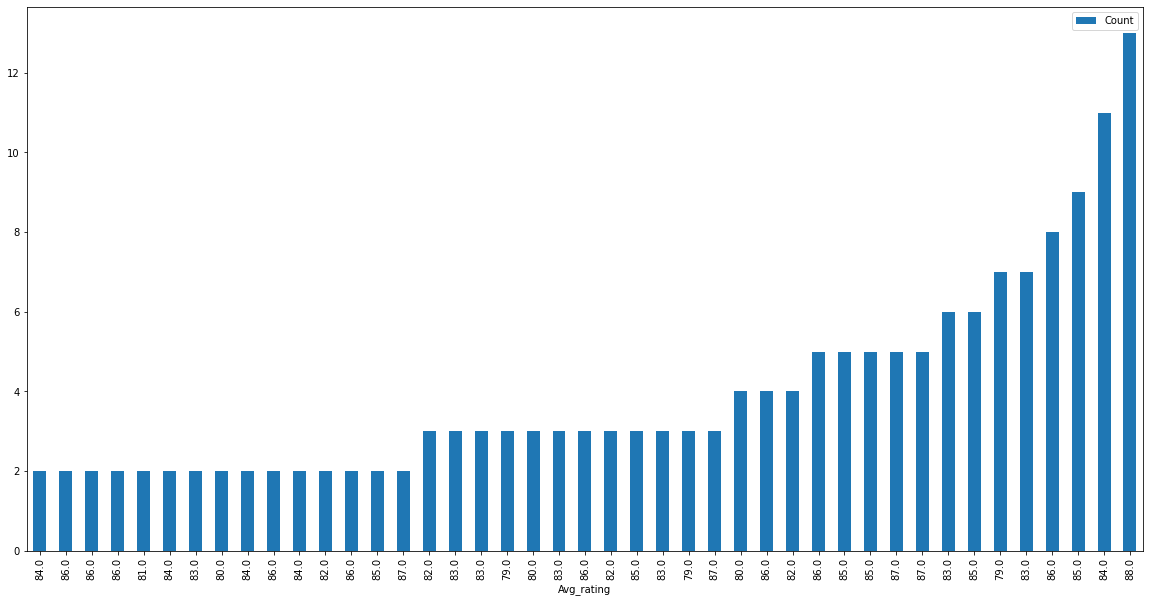

In [59]:
directors_rating = new_episodes.groupby(['director'],as_index=False)['rating'].agg({"Count":'count',"Avg_rating":np.mean,"std_rating":np.std}).sort_values(by='Count',ascending=True)
directors_rating['Avg_rating'] = round(directors_rating['Avg_rating'],0)
directors_rating.plot(kind='bar',x='Avg_rating',y='Count')

<AxesSubplot:xlabel='Avg_rating'>

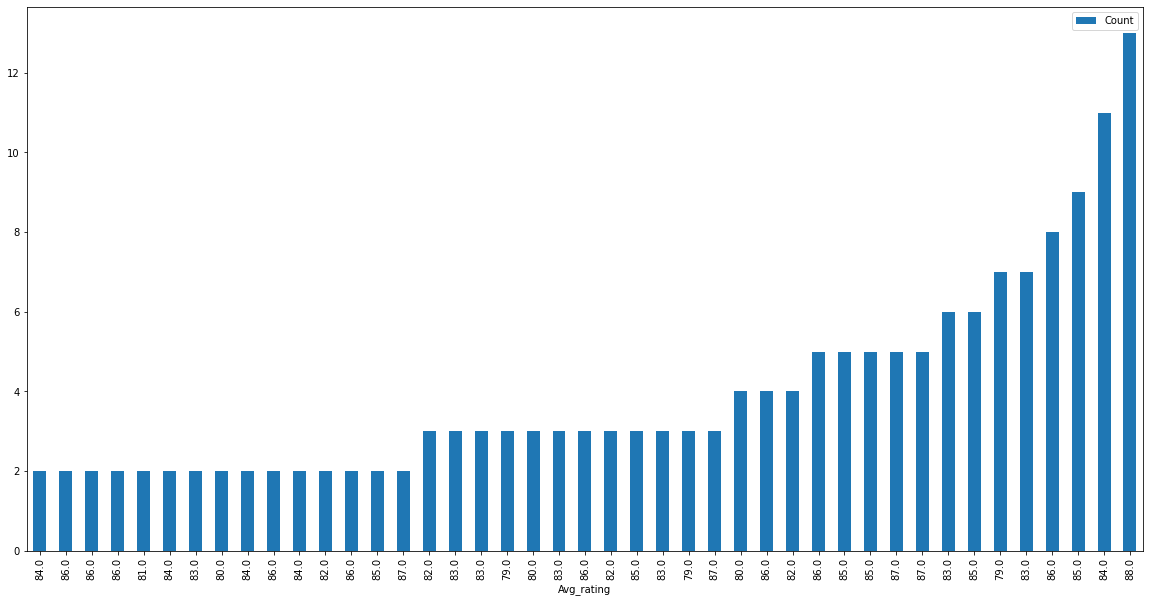

In [60]:
from matplotlib.pyplot import figure
plot.rcParams["figure.figsize"] = (20,10)
directors_rating.plot(kind='bar',x='Avg_rating',y='Count',stacked=True)

<AxesSubplot:xlabel='Count', ylabel='Avg_rating'>

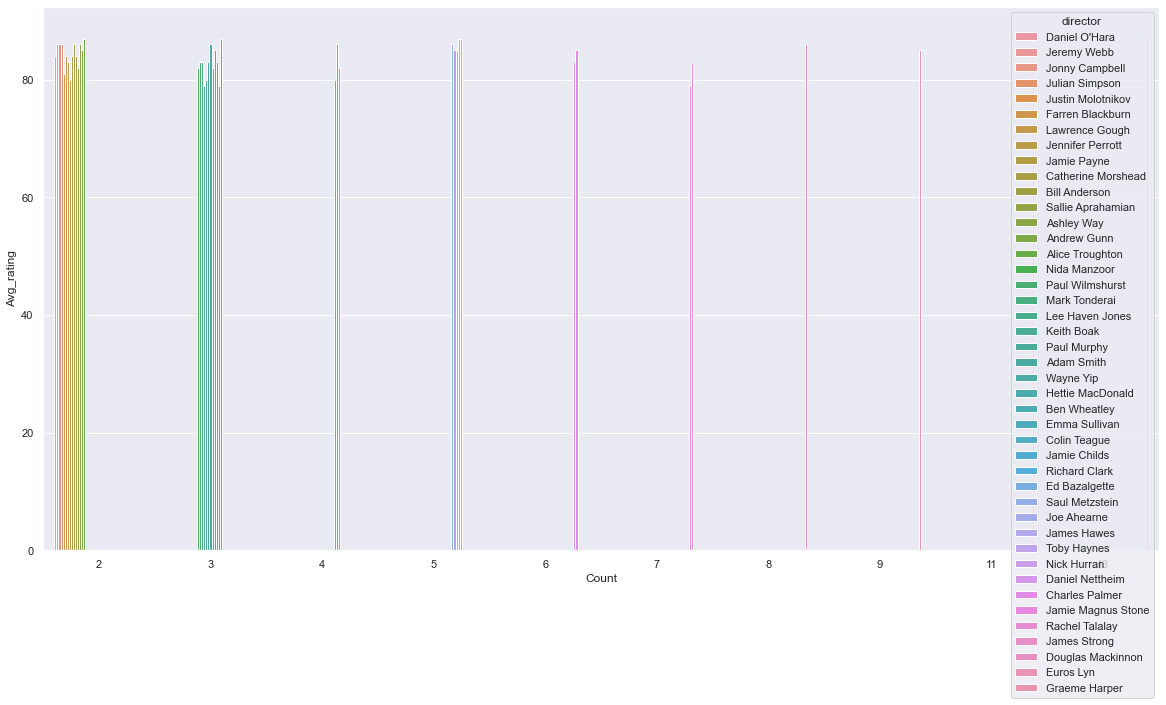

In [88]:
#directors_rating.plot.bar(x='Count',y='Avg_rating')
sns.barplot(x='Count',y='Avg_rating',hue='director',data=directors_rating)

<AxesSubplot:xlabel='Count', ylabel='Avg_rating'>

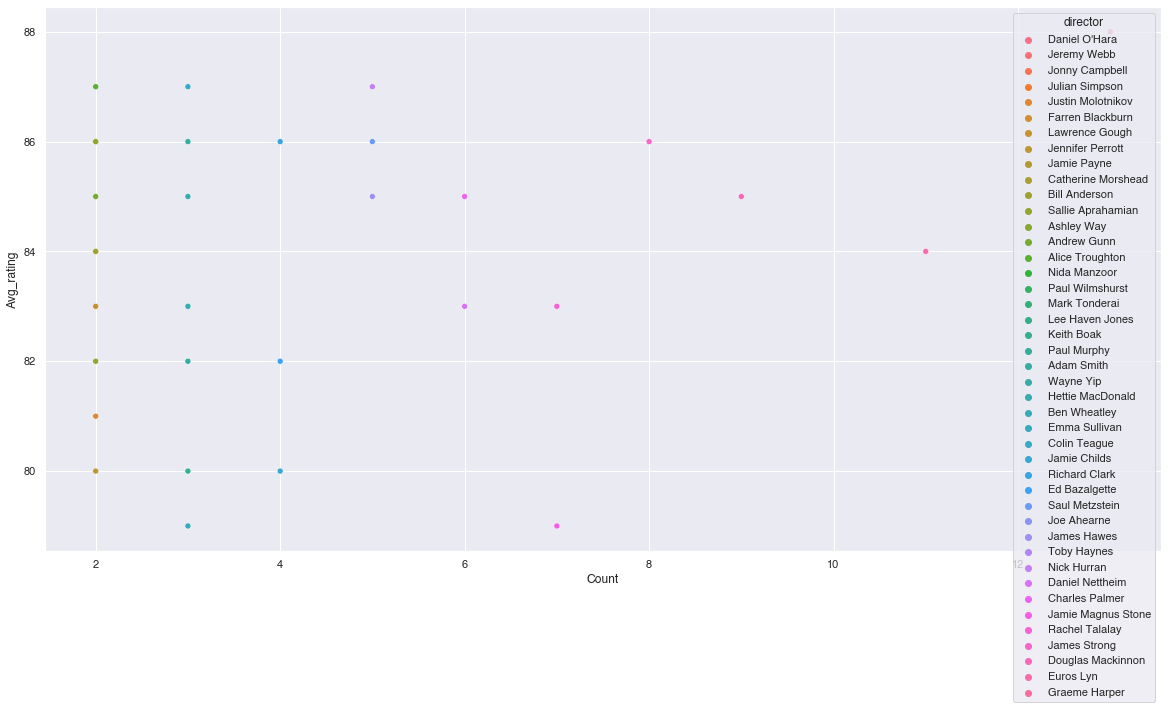

In [144]:
## Haciendo stack
sns.scatterplot(x='Count',
                y='Avg_rating',
                data=directors_rating,
                hue='director')

<AxesSubplot:xlabel='uk_viewers', ylabel='rating'>

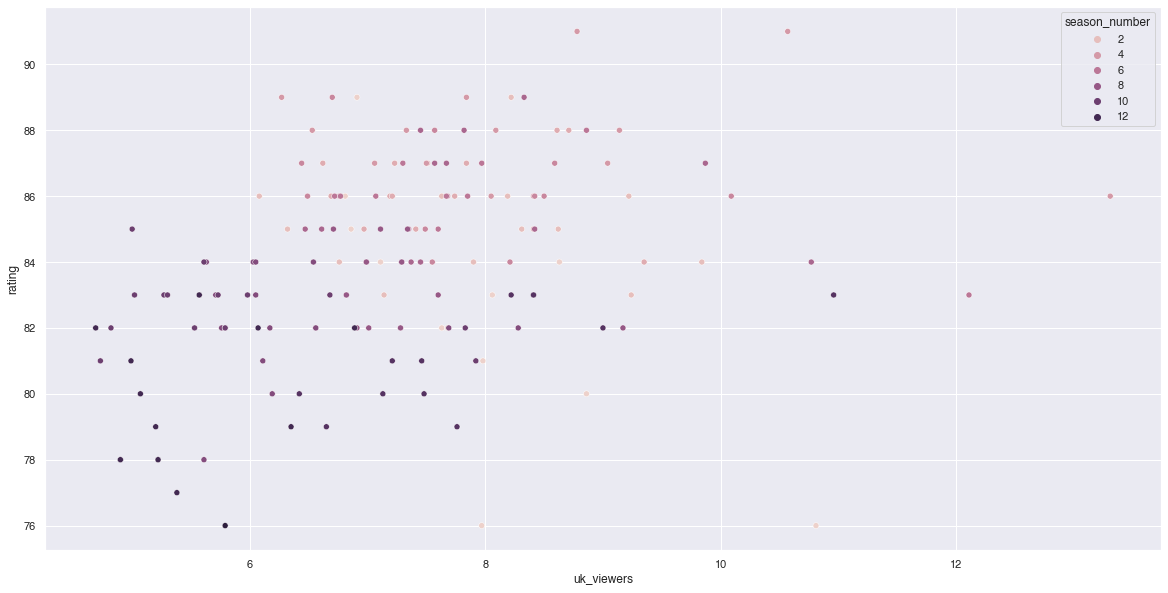

In [159]:
sns.scatterplot(x='uk_viewers',
                y='rating',
                hue='season_number',
                data=new_episodes)

## Limpieza de datos

* La limpieza de datos viene dada en formatos y corrección de los mismos
* Para lo anterior hay que explorar los datos para entender los cambios requeridos

In [146]:
episodes.columns

Index(['era', 'season_number', 'serial_title', 'story_number',
       'episode_number', 'episode_title', 'type', 'first_aired',
       'production_code', 'uk_viewers', 'rating', 'duration'],
      dtype='object')

In [160]:
## Se transforma la variable season_number en category

new_episodes['season_number'] = new_episodes['season_number'].astype('category') 

In [161]:
## Ahora comprobaremos que lso cambios esten realizados
## La función assert nos dirá si esto quedo totalmente cambiado o no!
#    *  Si no sale nada a la hora de ejecutarlo, los cambios fueron eficientes
#    * Si sale un error algun cambio no se realizo
assert new_episodes['season_number'].dtype == 'category'

In [151]:
assert new_episodes['season_number'].dtype == 'int'

AssertionError: 

<AxesSubplot:xlabel='uk_viewers', ylabel='rating'>

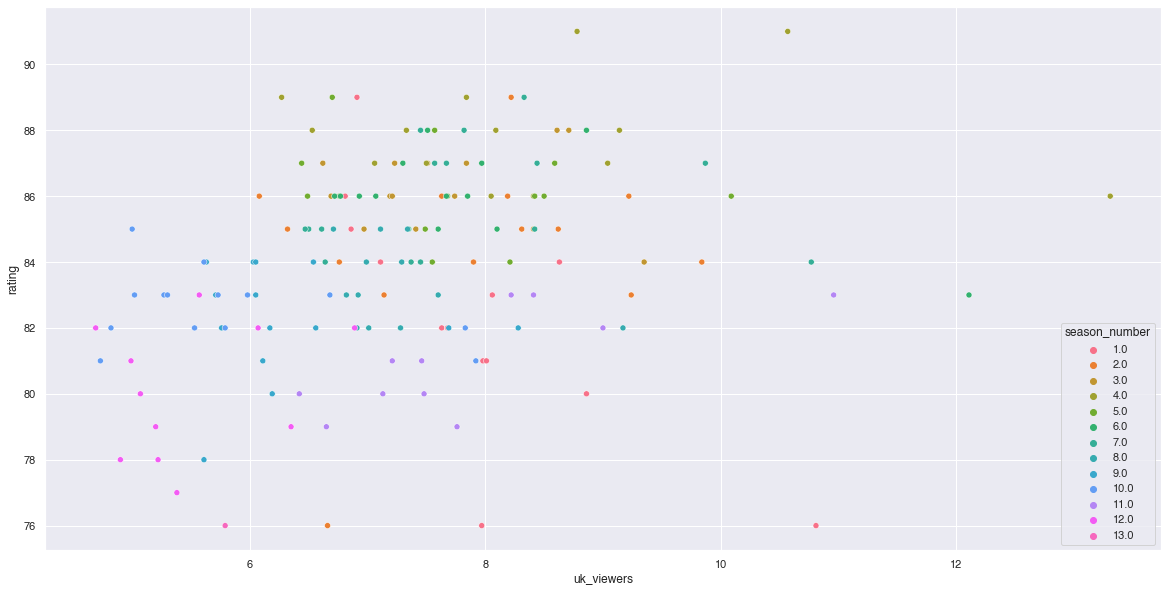

In [152]:
sns.scatterplot(x='uk_viewers',
                y='rating',
                hue='season_number',
                data=episodes)

## Trabajando con datos duplicados 

In [163]:
new_episodes.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
177    False
178    False
179    False
181    False
182    False
Length: 172, dtype: bool

In [162]:
new_episodes[new_episodes.duplicated()]

,era,season_number,serial_title,story_number,episode_number,episode_title,type,first_aired,production_code,uk_viewers,rating,duration,director,writer


In [164]:
## Validando por columnas especificas
# con .duplicated() hay una función keep con la cual puede eliminar o conservar los datos
#   * first: Deja las primeras apariciones
#   * last: Dejar las últimas apariciones
#   * False: Elimine todos los datos

duplicates = new_episodes.duplicated(subset='director', keep=False)

In [166]:
new_episodes[duplicates].sort_values(by='director')

,era,season_number,serial_title,story_number,episode_number,episode_title,type,first_aired,production_code,uk_viewers,rating,duration,director,writer
62,revived,5.0,NaN,203,1.0,The Eleventh Hour,episode,2010-04-03,1.1,10.09,86.0,65.0,Adam Smith,Steven Moffat
65,revived,5.0,NaN,206a,4.0,The Time of Angels,episode,2010-04-24,1.4,8.59,87.0,45.0,Adam Smith,Steven Moffat
66,revived,5.0,NaN,206b,5.0,Flesh and Stone,episode,2010-05-01,1.5,8.50,86.0,45.0,Adam Smith,Steven Moffat
47,revived,4.0,NaN,193,6.0,The Doctor's Daughter,episode,2008-05-10,4.6,7.33,88.0,45.0,Alice Troughton,Stephen Greenhorn
51,revived,4.0,NaN,196,10.0,Midnight,episode,2008-06-14,4.8,8.05,86.0,45.0,Alice Troughton,Russell T Davies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,revived,5.0,NaN,212b,13.0,The Big Bang,episode,2010-06-26,1.13,6.70,89.0,55.0,Toby Haynes,Steven Moffat
73,revived,5.0,NaN,212a,12.0,The Pandorica Opens,episode,2010-06-19,1.12,7.57,88.0,50.0,Toby Haynes,Steven Moffat
147,revived,10.0,NaN,273,9.0,Empress of Mars,episode,2017-06-10,NaN,5.02,83.0,44.0,Wayne Yip,Mark Gatiss
146,revived,10.0,NaN,272,8.0,The Lie of the Land,episode,2017-06-03,NaN,4.82,82.0,45.0,Wayne Yip,Toby Whithouse


Notesé que en el caso del duplicado por director, no se puede aplicar una eliminación dado que cada episodio que desarrollo es diferente

## Limpiando texto

In [174]:
estado_civil = ['Casado','casado','viviendo en pecado','viviendo en pecado','Viviendo en pecado', 'Casado ','4ever alone','4ever alone']
estado_civil = pd.DataFrame(estado_civil,columns=['Estado civil'])
estado_civil

,Estado civil
0,Casado
1,casado
2,viviendo en pecado
3,viviendo en pecado
4,Viviendo en pecado
5,Casado
6,4ever alone
7,4ever alone


In [175]:
estado_civil.value_counts()

Estado civil      
4ever alone           2
viviendo en pecado    2
Casado                1
Casado                1
Viviendo en pecado    1
casado                1
dtype: int64

In [176]:
## Eliminando espacios en blanco
## Recuerde que 'Casado ' tiene un espacio en blanco
## Para ello usaremos la función str.strip()
estado_civil['Estado civil'].str.strip()

0                Casado
1                casado
2    viviendo en pecado
3    viviendo en pecado
4    Viviendo en pecado
5                Casado
6           4ever alone
7           4ever alone
Name: Estado civil, dtype: object

In [177]:
estado_civil['Estado civil'] = estado_civil['Estado civil'].str.strip()
estado_civil.value_counts()

Estado civil      
4ever alone           2
Casado                2
viviendo en pecado    2
Viviendo en pecado    1
casado                1
dtype: int64

In [179]:
## Ahora Se va a cambiar la primer letra por mayuscula
estado_civil['Estado civil'].str.capitalize()

0                Casado
1                Casado
2    Viviendo en pecado
3    Viviendo en pecado
4    Viviendo en pecado
5                Casado
6           4ever alone
7           4ever alone
Name: Estado civil, dtype: object

In [180]:
estado_civil['Estado civil'] = estado_civil['Estado civil'].str.capitalize()
estado_civil.value_counts()

Estado civil      
Casado                3
Viviendo en pecado    3
4ever alone           2
dtype: int64

In [181]:
## Ahora limpiaremos un poco el dato

estado_civil['Estado civil'].str.replace('4','For ')

0                Casado
1                Casado
2    Viviendo en pecado
3    Viviendo en pecado
4    Viviendo en pecado
5                Casado
6        For ever alone
7        For ever alone
Name: Estado civil, dtype: object

In [182]:
estado_civil['Estado civil']= estado_civil['Estado civil'].str.replace('4','For ')
estado_civil.value_counts()

Estado civil      
Casado                3
Viviendo en pecado    3
For ever alone        2
dtype: int64

In [183]:
import datetime as dt
imdb

,season,ep_num,air_date,rating,rating_n,desc
0,1,1,17 Mar. 2006,7.5,8301,When ordinary shop-worker Rose Tyler meets a m...
1,1,2,17 Mar. 2006,7.5,7279,The Doctor takes Rose to the year 5 billion to...
2,1,3,24 Mar. 2006,7.5,6804,The Doctor has great expectations for his late...
3,1,4,31 Mar. 2006,7.0,6543,The Doctor returns Rose to her own time - well...
4,1,5,7 Apr. 2006,7.0,6337,The Slitheen have infiltrated Parliament and h...
...,...,...,...,...,...,...
155,12,7,9 Feb. 2020,5.5,3451,"From ancient Syria to present day Sheffield, a..."
156,12,8,16 Feb. 2020,6.9,3582,"Villa Diodati, 1816 - on a night that inspired..."
157,12,9,23 Feb. 2020,6.3,3355,"In the far future, the Doctor and her friends ..."
158,12,10,1 Mar. 2020,4.9,4743,"In the epic and emotional season finale, the C..."


In [187]:
pd.to_datetime(imdb['air_date'])

0     2006-03-17
1     2006-03-17
2     2006-03-24
3     2006-03-31
4     2006-04-07
         ...    
155   2020-02-09
156   2020-02-16
157   2020-02-23
158   2020-03-01
159   2021-01-01
Name: air_date, Length: 160, dtype: datetime64[ns]

In [188]:
imdb['air_date'] = pd.to_datetime(imdb['air_date'])
imdb

,season,ep_num,air_date,rating,rating_n,desc
0,1,1,2006-03-17,7.5,8301,When ordinary shop-worker Rose Tyler meets a m...
1,1,2,2006-03-17,7.5,7279,The Doctor takes Rose to the year 5 billion to...
2,1,3,2006-03-24,7.5,6804,The Doctor has great expectations for his late...
3,1,4,2006-03-31,7.0,6543,The Doctor returns Rose to her own time - well...
4,1,5,2006-04-07,7.0,6337,The Slitheen have infiltrated Parliament and h...
...,...,...,...,...,...,...
155,12,7,2020-02-09,5.5,3451,"From ancient Syria to present day Sheffield, a..."
156,12,8,2020-02-16,6.9,3582,"Villa Diodati, 1816 - on a night that inspired..."
157,12,9,2020-02-23,6.3,3355,"In the far future, the Doctor and her friends ..."
158,12,10,2020-03-01,4.9,4743,"In the epic and emotional season finale, the C..."


## Comparando texto

In [191]:
#!pip install fuzzywuzzy
from fuzzywuzzy import fuzz

/Users/daniel/miniconda3/lib/python3.7/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [193]:
fuzz.WRatio('You to','You Two')

92